# Auto Insurance claims fraud detection.

Auto insurance
This database consists of 39 variables

Data set from Kaggle: Insurance Claim
https://www.kaggle.com/roshansharma/insurance-claim

This data set contains claims information on Auto Insurance reported in three states, IL, IN and OH, from 2004 to 2013. The objective of this analysis will be to determine the factors that will determine that given a claim it is a fraud.


EXPLORATORY DATA ANALYSIS

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import joypy

In [6]:
# for interactive visualizations
import plotly
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

# for animated visualizations
from bubbly.bubbly import bubbleplot
import plotly_express as px

import plotly.graph_objects as go
from ipywidgets import widgets
import pandas as pd
import numpy as np
import plotly.offline as pyo

In [3]:
#Impor the data
claims = pd.read_csv('insurance_claims.csv')

In [4]:
# let's take a look at the data
pd.set_option('display.max_columns', None)#If max_cols is exceeded, switch to truncate view. Depending on large_repr, objects are either centrally truncated or printed as a summary view.
#‘None’ value means unlimited.
claims.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip insured_sex insured_education_level insured_occupation  \
0       466132        MALE                      MD       craft-repair   
1       468176        MALE                      MD  machine-op-inspct   
2       430632      FEMALE                     PhD              sales   
3       608117      FEMALE                     PhD       armed-forces   
4       610706        MALE               Associate              sales   

  insured_hobbies insured_relationship  capital-gains  capital-loss  \
0        sleeping              husband          53300             0   
1         reading       other-relative              0             0   
2     board-games            own-child          35100             0   
3     board-games            unmarried          48900        -62400   
4     board-games            unmarried          66000        -46000   

  incident_date             incident_type   collision_type incident_severity  \
0    25-01-2015  Single Vehicle Collision   Side Collision      Major Damage   
1    21-01-2015             Vehicle Theft                ?      Minor Damage   
2    22-02-2015   Multi-vehicle Collision   Rear Collision      Minor Damage   
3    10-01-2015  Single Vehicle Collision  Front Collision      Major Damage   
4    17-02-2015             Vehicle Theft                ?      Minor Damage   

  authorities_contacted incident_state incident_city  incident_location  \
0                Police             SC      Columbus     9935 4th Drive   
1                Police             VA     Riverwood       6608 MLK Hwy   
2                Police             NY      Columbus  7121 Francis Lane   
3                Police             OH     Arlington   6956 Maple Drive   
4                  None             NY     Arlington       3041 3rd Ave   

   incident_hour_of_the_day  number_of_vehicles_involved property_damage  \
0                         5                            1             YES   
1                         8                            1               ?   
2                         7                            3              NO   
3                         5                            1               ?   
4                        20                            1              NO   

   bodily_injuries  witnesses police_report_available  total_claim_amount  \
0                1          2                     YES               71610   
1                0          0                       ?                5070   
2                2          3                      NO               34650   
3                1          2                      NO               63400   
4                0          1                      NO                6500   

   injury_claim  property_claim  vehicle_claim  auto_make auto_model  \
0          6510           13020          52080       Saab        92x   
1           780             780           3510   Mercedes       E400   
2          7700            3850          23100      Dodge        RAM   
3          6340            6340          50720  Chevrolet      Tahoe   
4          1300             6

In [5]:
#Shape of the data set
claims.shape

(1000, 39)

In [6]:
#Information about the dataset
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

Descriptive Statistics

We can see the count, mean, std dev, min, max values for the numerical variables in the data.


In [7]:

claims.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

In [35]:
#Check some categorical variables
claims.nunique()


months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [34]:
print(claims.insured_education_level.unique())

['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']


In [112]:
print(claims.incident_type.unique())


['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']


Data cleaning.

In [10]:
#Get the number of missing data points per column
missing_values_count = claims.isnull().sum()
# how many total missing values do we have?
total_cells = np.product(claims.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.0

In [12]:
# We did not find missing values but there is a character, "?" that we would like to replace for NAN value.

claims = claims.replace('?',np.NaN)

claims.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [14]:
#To treat the NAN values let's see their representation or percentage of for the colums that have it.
#Percent of each feature that is missing.
nas=pd.DataFrame(claims.isnull().sum().sort_values(ascending=False)/len(claims),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

percent
property_damage            0.360
police_report_available    0.343
collision_type             0.178

For all these variables the percentage of NAN values is small. Given the small sample size(1000), I will suggest modify the rows with NAN values based on the following criteria:

In [19]:


#Variable: 
#property_damage .- Asume that if there was no response (NAN) then we assign a NO value.

claims['property_damage'].fillna('NO', inplace = True)

# police_report_available .- Assume that the NAN values correspond to a report not filled.

claims['police_report_available'].fillna('NO', inplace = True)

#collision_type .- Replace the NAN values for the most common value in the sample.

claims['collision_type'].fillna(claims['collision_type'].mode()[0], inplace = True)

claims.isnull().any().any()



False

Checking for Correlation between variables.

In [23]:
claims.corr()

months_as_customer       age  policy_number  \
months_as_customer                     1.000000  0.922098       0.057555   
age                                    0.922098  1.000000       0.059413   
policy_number                          0.057555  0.059413       1.000000   
policy_deductable                      0.026807  0.029188      -0.006738   
policy_annual_premium                  0.005018  0.014404       0.022566   
umbrella_limit                         0.015498  0.018126       0.008968   
insured_zip                            0.017895  0.025604       0.007083   
capital-gains                          0.006399 -0.007075       0.009802   
capital-loss                           0.020209  0.007368      -0.005669   
incident_hour_of_the_day               0.070639  0.087161       0.000113   
number_of_vehicles_involved            0.014736  0.022102       0.013432   
bodily_injuries                       -0.010162 -0.015679      -0.004558   
witnesses                              0.058383  0.052359      -0.012661   
total_claim_amount                     0.062108  0.069863      -0.018009   
injury_claim                           0.065329  0.075522      -0.008762   
property_claim                         0.034940  0.060898      -0.010678   
vehicle_claim                          0.061013  0.062588      -0.020184   
auto_year                             -0.000292  0.001354      -0.000183   

                             policy_deductable  policy_annual_premium  \
months_as_customer                    0.026807               0.005018   
age                                   0.029188               0.014404   
policy_number                        -0.006738               0.022566   
policy_deductable                     1.000000              -0.003245   
policy_annual_premium                -0.003245               1.000000   
umbrella_limit                        0.010870              -0.006247   
insured_zip                           0.004545               0.032354   
capital-gains                         0.035212              -0.013738   
capital-loss                         -0.023544               0.023547   
incident_hour_of_the_day              0.060935              -0.001578   
number_of_vehicles_involved           0.051214              -0.045991   
bodily_injuries                      -0.022765               0.026780   
witnesses                             0.066639               0.002332   
total_claim_amount                    0.022839               0.009094   
injury_claim                          0.039107              -0.017633   
property_claim                        0.064792              -0.011654   
vehicle_claim                         0.005269               0.020246   
auto_year                             0.026105              -0.049226   

                             umbrella_limit  insured_zip  capital-gains  \
months_as_customer                 0.015498     0.017895       0.006399   
age                                0.018126     0.025604      -0.007075   
policy_number                      0.008968     0.007083       0.009802   
policy_deductable                  0.010870     0.004545       0.035212   
policy_annual_premium             -0.006247     0.032354      -0.013738   
umbrella_limit                     1.000000     0.019671      -0.047268   
insured_zip                        0.019671     1.000000       0.006303   
capital-gains                     -0.047268     0.006303       1.000000   
capital-loss                      -0.024056     0.049372      -0.046904   
incident_hour_of_the_day          -0.023257     0.008274      -0.016406   
number_of_vehicles_involved       -0.021270     0.027448       0.061643   
bodily_injuries                    0.022743     0.028695       0.055829   
witnesses                         -0.006738     0.019805      -0.017651   
total_claim_amount                -0.040344    -0.033873       0.015980   
injury_claim                      -0.045412    -0.017495       0.025934

Data visualizations.

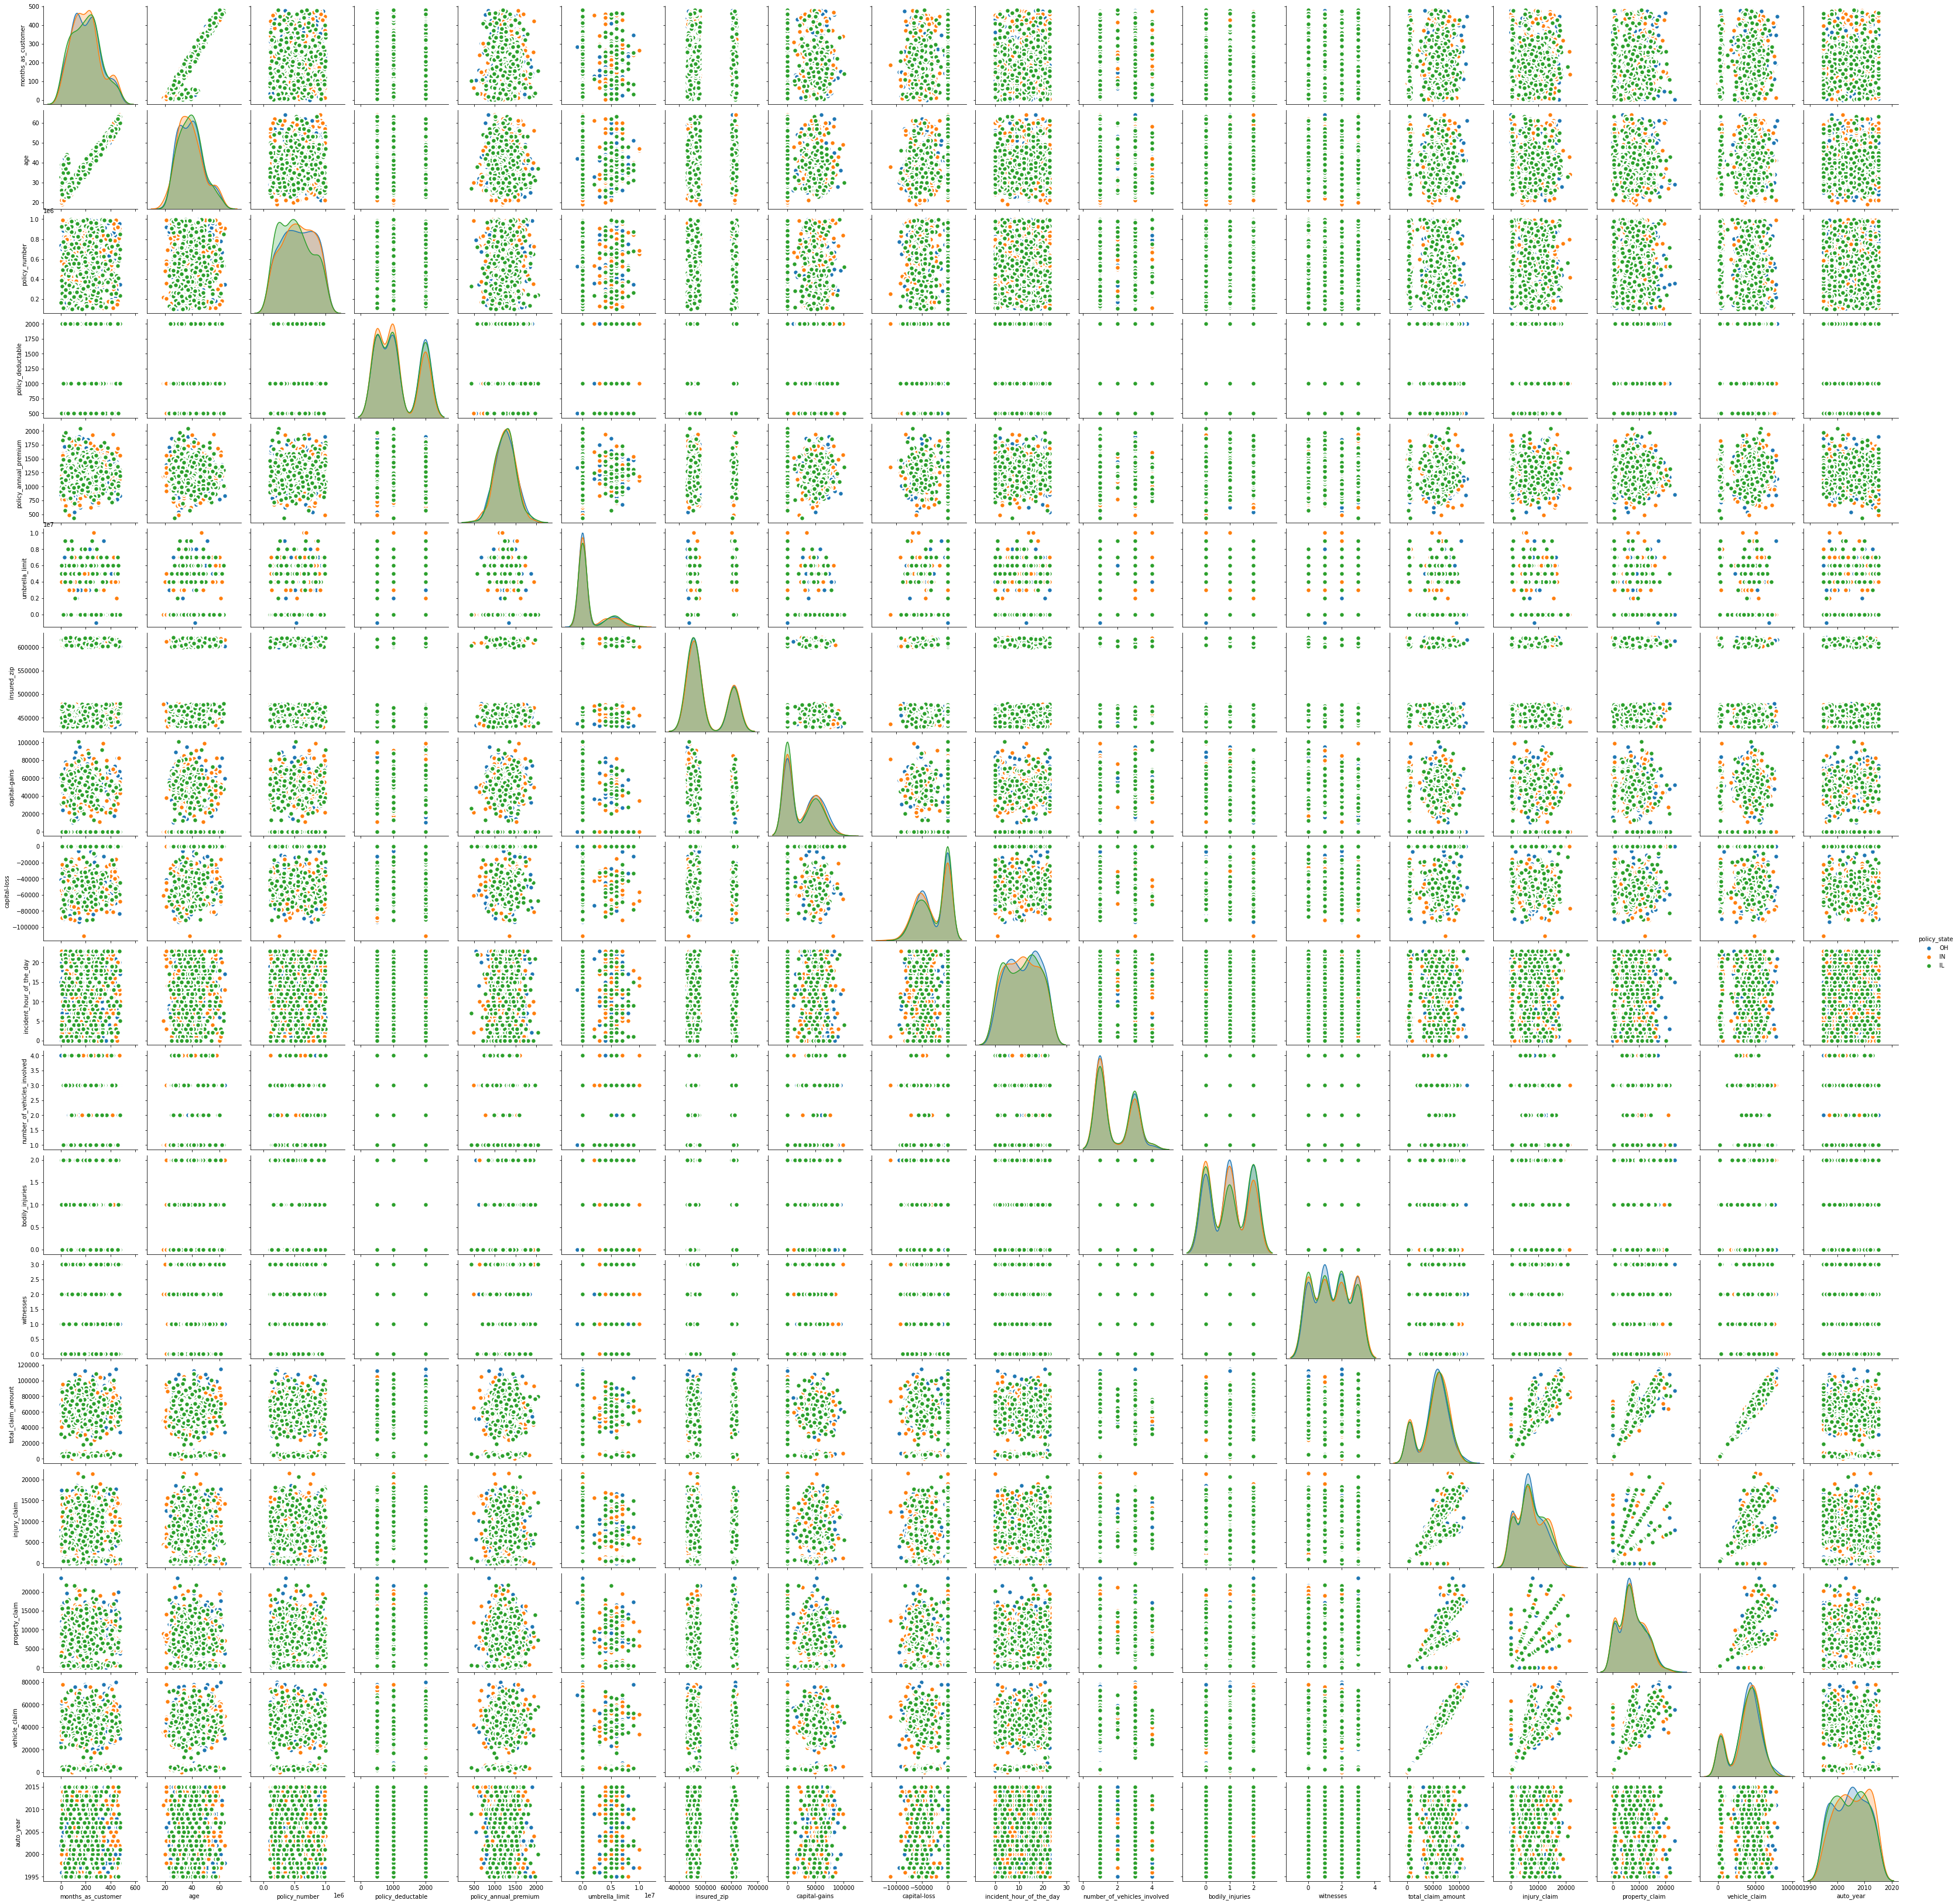

In [22]:
sns.pairplot(claims, kind="scatter", hue="policy_state", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

It seems int this correlation plot by State, that there is no visible difference in claim distribution by state.
We can alse see that there is positive high correlation between Total claim amount and vehicle claim as well as with property claim amount and Injury claim.
We can also see a positive high correlation between age and months as customer.

We can see in more detail the correlation coefficient between, vehicle claim as well as with property claim amount and Injury claim amount.

/Users/jose1/opt/anaconda3/envs/DataCamp/lib/python3.7/site-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


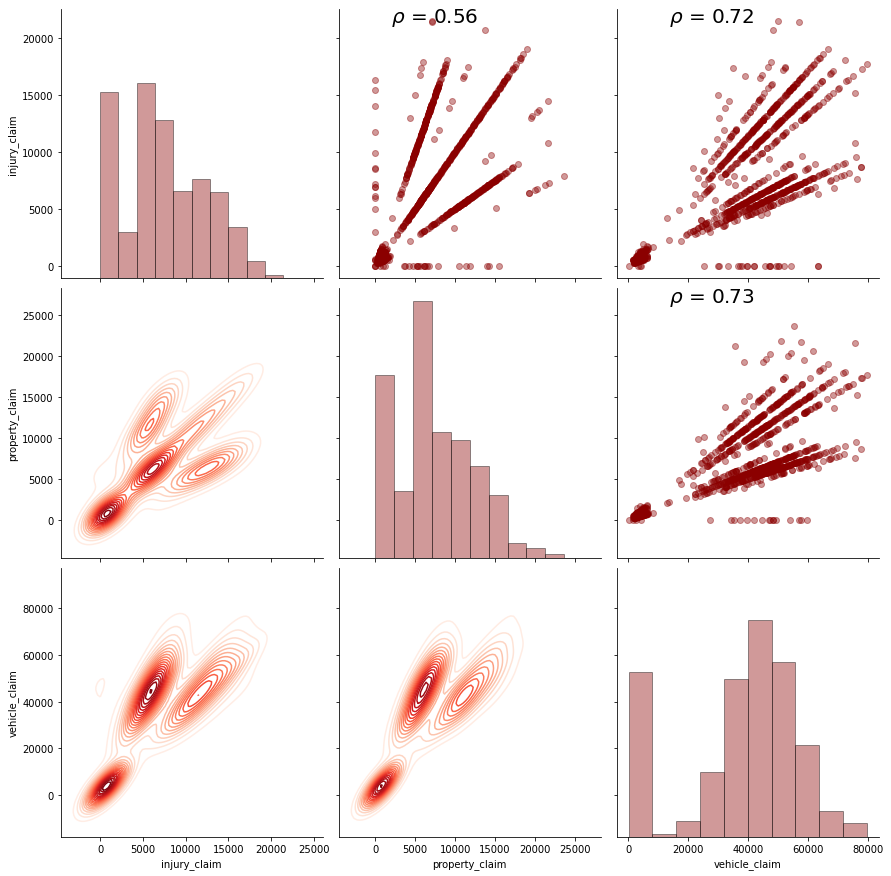

In [30]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.95), size = 20, xycoords = ax.transAxes)
    
# Create a pair grid instance
grid = sns.PairGrid(data= claims,
                    vars = ['injury_claim', 'property_claim', 'vehicle_claim'], size = 4)

# Map the plots to the locations
grid = grid.map_upper(plt.scatter, color = 'darkred',alpha=.4)
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds',n_levels=20)
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'darkred',alpha=.4);

In [44]:
claims['policy_deductable'] = claims.policy_deductable.astype('category')

claims.dtypes



months_as_customer                int64
age                               int64
policy_number                     int64
policy_bind_date                 object
policy_state                     object
policy_csl                       object
policy_deductable              category
policy_annual_premium           float64
umbrella_limit                    int64
insured_zip                       int64
insured_sex                      object
insured_education_level          object
insured_occupation               object
insured_hobbies                  object
insured_relationship             object
capital-gains                     int64
capital-loss                      int64
incident_date                    object
incident_type                    object
collision_type                   object
incident_severity                object
authorities_contacted            object
incident_state                   object
incident_city                    object
incident_location                object


Now, we are going to analyze different variables with the objective of finding variables that my be relevant in the analsis of claims that are defined as fraud.

We start by seeing that there are 27% of fraud claims in the data set.

In [7]:
fraud = claims['fraud_reported'].value_counts()

label_fraud = fraud.index
size_fraud = fraud.values

colors = ['silver', 'orange']
trace = go.Pie(
         labels = label_fraud, values = size_fraud, marker = dict(colors = colors), name = 'Frauds', hole = 0.3)


df = [trace]

layout = go.Layout(
           title = 'Distribution of Frauds')

fig = go.Figure(data = df, layout = layout)

py.iplot(fig)

We see that for all the claims the majority of the claims are vehicle collision and multi-vehicle collision. These claims are present a larger variance on claim amount than vehicle theft and parked car.

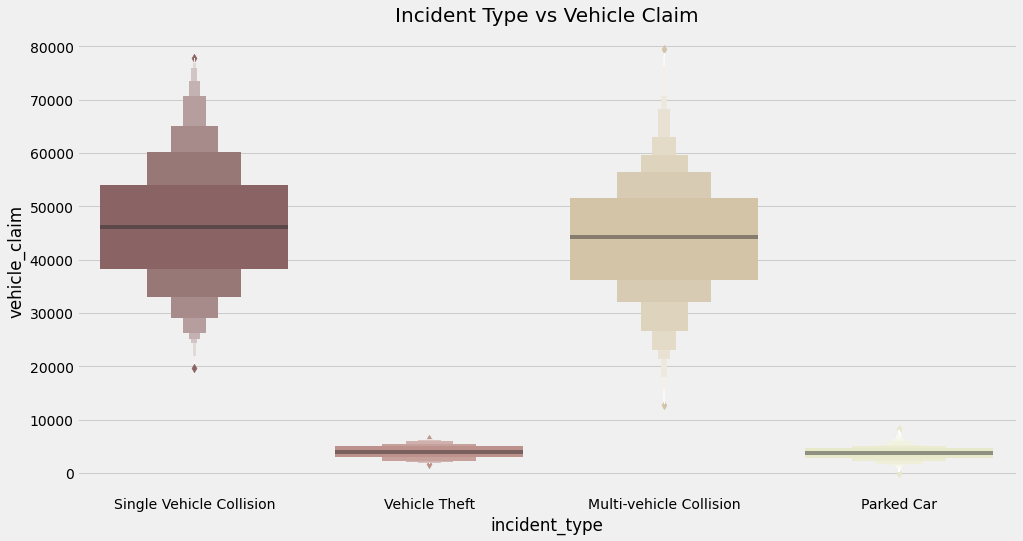

In [9]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.boxenplot(claims['incident_type'], claims['vehicle_claim'], palette = 'pink')
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

Given the type of incident we can see that the mayority of fraud claims are single vehicle collision and multi-vehicle collision.

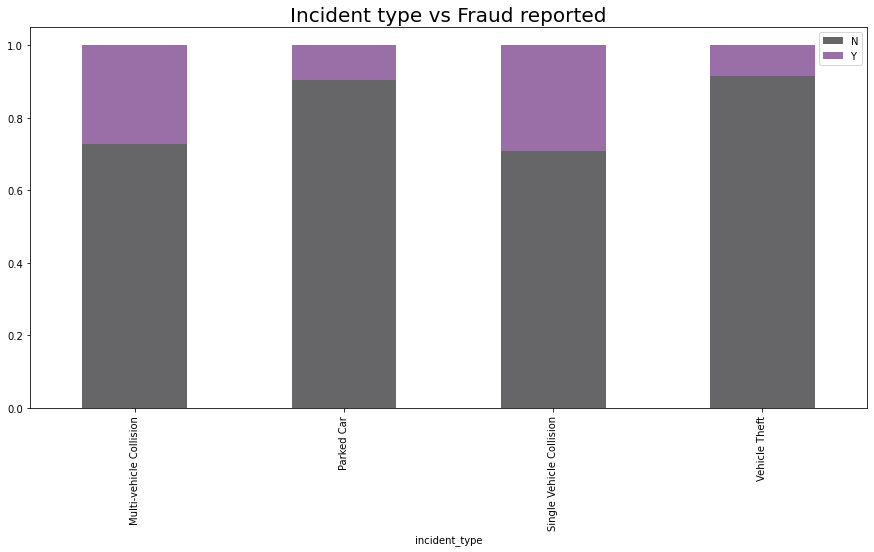

In [8]:
incident = pd.crosstab(claims['incident_type'], claims['fraud_reported'])
colors = plt.cm.inferno(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors, alpha=.6)

plt.title('Incident type vs Fraud reported', fontsize = 20)
plt.legend()
plt.show()

In the following chart we can see that troughout the years we see that the claim amounts are within 40k and 100k and the annual premium is between 1,000 and 1,500. We can't see a clear pattern among the years for the fraud claims.

In [10]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = claims, x_column = 'policy_annual_premium', y_column = 'total_claim_amount', 
    bubble_column = 'fraud_reported', time_column = 'auto_year', size_column = 'number_of_vehicles_involved', color_column = 'fraud_reported', 
    x_title = "Annual Policy Premium", y_title = "Total Claim Amount", title = 'Annual Premium vs Total Claim Amount vs Fraud Reported',
    x_logscale = False, scale_bubble = .2, height = 650)

py.iplot(figure, config={'scrollzoom': True})

In terms of automobile make company and vehicle claim amount, we can see that Toyota has the wides variance on claim amount reported.

In [11]:
trace = go.Box(
          x = claims['auto_make'],
          y = claims['vehicle_claim'],
          opacity = 0.7,
          marker = dict(
                 color = 'rgba(255, 144, 14, 0.5)'
              
              #rgb(215, 195, 5, 0.5)
          )
)
df = [trace]

layout = go.Layout(
    title = 'Automobile Company vs Vehicle Claim')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

When we see the auto make variable against the count of claim frauds, we can see that Toyota does not represent a particular high number of fraud claims (5.3%). Further analysis is need to conclude that the distribution of fraud claims could be explained by auto make.

In [12]:
from pivottablejs import pivot_ui
pivot_ui(claims)

In the following parallel categories diagram, we can see how the insured distribute by level of education, if they filled a police report and if their claim was a fraud. We can see that all levels of education show similar percentage of fraudulent claims and simular percentage of claims reported to the police.
NOTE: I am still working on linking the scatter plot of Annual premium and total claim amount to the parallel categories diagram.

Parallel Categories Diagram

In [81]:


pyo.init_notebook_mode()

# Build  dimensions
categorical_dimensions = ['insured_education_level', 'police_report_available', 'fraud_reported'];

dimensions = [dict(values=claims[label], label=label) for label in categorical_dimensions]

# Build colorscale
color = np.zeros(len(claims), dtype='uint8')
colorscale = [[0, 'gray'], [1, 'firebrick']]

# Build figure as FigureWidget
fig = go.FigureWidget(
    data=[go.Scatter(x=claims.policy_annual_premium, y=claims.total_claim_amount,
    marker={'color': 'gray'}, mode='markers', selected={'marker': {'color': 'firebrick'}},
    unselected={'marker': {'opacity': 0.3}}), go.Parcats(
        domain={'y': [0, 0.4]}, dimensions=dimensions,
        line={'colorscale': colorscale
              , 'cmin': 0,
              'cmax': 1, 'color': color, 'shape': 'hspline'})
    ])

fig.update_layout(
        height=800, xaxis={'title': 'Annual premium'},
        yaxis={'title': 'Total Claim Amount', 'domain': [0.6, 1]},
        dragmode='lasso', hovermode='closest')

# Update color callback
def update_color(trace, points, state):
    # Update scatter selection
    fig.data[0].selectedpoints = points.point_inds

    # Update parcats colors
    new_color = np.zeros(len(claims), dtype='uint8')
    new_color[points.point_inds] = 1
    fig.data[1].line.color = new_color

# Register callback on scatter selection...
fig.data[0].on_selection(update_color)
# and parcats click
fig.data[1].on_click(update_color)

fig.show()

Given the insured occupation we can see that the percentage of fraud per state is more less consitent for the three states, IL, In and OH. In total there are two ocupations that present the higher percentage of frauds, Machine operator inspector with 9.3% and Profesional specialty with 8.5%. Even though these ocupations present the higer rate, fraud is almost evenly distributed among ocupations.

In [108]:
from pivottablejs import pivot_ui
pivot_ui(claims)


When we look at number of claims when authorities where contacted, the claims that where were frauds contacted police less frequenlty than the claims that where not reported as fraudulent. For the rest of the authorities contatacted the claims that were fraud and the ones that were not fraud behaved simalarly. 

In [132]:
from pivottablejs import pivot_ui
pivot_ui(claims)

By observing the claims given the hour of the day, there is an increase of the regular claims during rush hour between 8:00am and 9:00am then we see a decline with an increse around lunch hour, then they decrease just to pick again between 4:00pm and 5:00pm. We can consider this a regular behavior for working people. On the other hand we can see that for the claims that were frauds the number of claims decreses during rush hour between 8:00am and 9:00am and between 4:00pm and 5:00pm. 

In [133]:
from pivottablejs import pivot_ui
pivot_ui(claims)

There is a clear disparity between claims that were reported as fraud and the ones that not in terms of incident severity. We can see that that for regular claims, the majority of the claims are considered minor damage (42%) and the second higher category will be total loss (32.4%). For the fraudulent claims, we see that the grand mayority of the claims are considered major damage (67.6%) and the minor damage (15.4&) and total loss (14.6%) have similar proportions.

In [136]:
from pivottablejs import pivot_ui
pivot_ui(claims)

Conclusions of the exploratory data analysis.

As a conclusion we can see that in general claims are distributed similarly on the diffrent states. We saw that out of the total claims in the sample thre are 24.7% claims considered frauds. We also saw that given incident type the more common claim reported as fraud are the ones involving a collision either involving one vehicle or multi vehicle collision. And these types of claims also present the biggest variance on vehicle claim.

We also saw in the case of a fraud claim that insured people contacted the police less frequently than when the claims were not a fraud. We noticed a difference in the number of incidents by hour between the normal claims and the fraud claims. It seems that fraud claims are less common during rush hour than the regular claims. Finally, we can also found that 67.6% of the fraud claims are considered Major Damage claims a significant diffence with the regular claims that present just a 14.5% of this type of claim.

We now have an idea of which variables may contribute more on predicting if a claim is a fraud or not. Further model analysis will follow.


